# Inverse Methods Homework 1: Problem 1
## Snake River Data
### Problem Statement:
*The Snake River dataset gives g = water content of snow (first column) on April 1 and d = water yield
(second column) from April to July (in inches) in the Snake River watershed in Wyoming for n = 17
years (1919 to 1935).*

### Deliverables:
a) Fit the data to a standard linear regression model

b) Find $\hat{m}_0$ and $\hat{m}_1$ and plot the residuals. Do they appear reasonable?

c) Test the hypothesis that the intercept is zero

### Data Reference
http://spot.colorado.edu/~henzed/MCEN5228_f2017/hw/snake_river.txt

Slope(m0):  0.7253804358151066
Intercept(m1):  0.49808119763664366


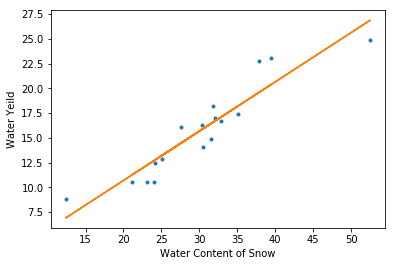

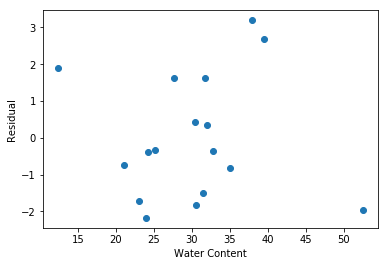

tobs =  -0.43733018107411886
t975 =  2.1199052992210112


In [2]:
# Import Packages
import requests
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

# Import data
F = 'http://spot.colorado.edu/~henzed/MCEN5228_f2017/hw/snake_river.txt'
imp = requests.get(F).text

# Format data
data = np.fromstring(imp, sep=' ')
data = data.reshape(int(len(data)/2),2)
g = data[:,0] # Water Content
d = data[:,1] # Water Yield

# Basic Calculations
n = len(d) # Number of Elements
m = np.mean(d) # Mean of Data
s = np.sqrt(np.sum((d-m)**2)/(n-1)) # Sample Standard Deviation of Data

# Plot Data
plt.plot(g,d,'.')
plt.xlabel('Water Content of Snow')
plt.ylabel('Water Yeild')

# Create Matrix of Coefficients
G = np.ones((len(g),2))
G[:,1]=g

# Invert to Find Coefficients
m1, m0 = np.linalg.lstsq(G, d)[0]
print('Slope(m0): ', m1)
print('Intercept(m1): ', m0)

# Calculate and Plot Trend
Gm = np.polyval([m0, m1], g)
plt.plot(g,Gm)
plt.show()

# Calculate and Plot Residuals
r = d - Gm
plt.plot(g,r,'o')
plt.xlabel('Water Content')
plt.ylabel('Residual')
plt.show()

# Hypothesis Testing
tobs = (0-m0)*np.sqrt(n)/s
print('tobs = ', tobs)
t975 = st.t.ppf(0.975, n-1)
print('t975 = ', t975)

### Discussion
a) Trend seems to align with data

b) Residuals lie approximately between -3 and 3 and seem reasonable in context of data.

c)Since the absolute value of our observed t value is less than the two tailed t value at 95% confidence, we can say with 95% confidence that we do not reject the hypothesis that the intercept is at zero.